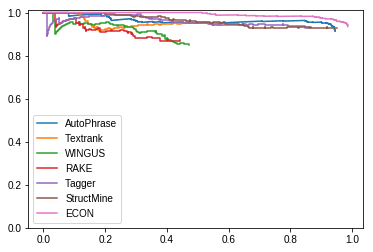

In [1]:
import matplotlib as mpl
mpl.rcParams["font.sans-serif"] = ["Arial", "Liberation Sans", "Bitstream Vera Sans"]
mpl.rcParams["font.family"] = "sans-serif"

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import precision_recall_curve, roc_curve
curve = roc_curve
dataset = 'machine_learning'
# database
# 'pubmed'
APPROACHES = ['auto', 'textrank', 'kea', 'rake', 'spacy_np', 'StructMineDataPipeline', 'econ']
concept_list = []
y_true = []
concept2label = {}
with open('data/evaluation/%s/ground_truth.txt' % dataset) as f_in_labels:
    for l in f_in_labels:
        try:
            if '\t' not in l:
                continue
            concept, label = l.split('\t')
            concept = concept.strip()
            concept_list.append(concept)
            label = int(label.strip())
            concept2label[concept] = label
            assert label
            y_true.append(label)
        except Exception as e:
            y_true.append(0)

approach2concept2score = {approach: {} for approach in APPROACHES}


from collections import defaultdict
approach2concept2rank = {approach: defaultdict(lambda: 5000) for approach in APPROACHES}
with open('data/evaluation/%s/ground_truth_explanation_rank.txt' % dataset) as f_in_explanation:
    for line in f_in_explanation:
        try:
            concept, explanation = line.strip().split('\t')
            explanation = explanation.split(' ')
            for l in explanation:
                approach, score = l.split(':')
                score = float(score)
                approach2concept2rank[approach][concept] = score
        except Exception as e:
            pass
        
approach2precision_recall_thresholds = {}
for approach in APPROACHES:
    y_scores = [approach2concept2score[approach].setdefault(concept, 0) for concept in concept_list]
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    index = recall < 1
    precision, recall = precision[index], recall[index]

    # for approach in APPROACHES:
    #     precision, recall, _ = precision_recall_curve(y_test, y_score)
    approach2precision_recall_thresholds[approach] = (precision, recall, thresholds)
    plt.step(recall, precision, alpha=1)

#     cut down the curve
plt.ylim(0,1.01)
plt.legend(['AutoPhrase', 'Textrank', 'WINGUS', 'RAKE', 'Tagger', 'StructMine', 'ECON'])